## This notebook will be used for Capstone Project

In [139]:
import pandas as pd
import numpy as np
from numpy import nan
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [2]:
print("Hello capstone project course!")

Hello capstone project course!


### Read CSV file into dataframe

In [4]:
df=pd.read_csv("http://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv")
df.head()

C:\Users\sarfaraz.nawaz\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.344896,47.717173,1,1003,1003,3503158,Matched,Block,NaN,AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,...,Dry,Daylight,Y,NaN,NaN,45,Vehicle - Pedalcyclist,15057,0,N
1,-122.376467,47.543774,2,56200,56200,1795087,Matched,Block,NaN,35TH AVE SW BETWEEN SW MORGAN ST AND SW HOLLY ST,...,Dry,Dark - Street Lights On,NaN,6015003.0,NaN,0,Vehicle going straight hits pedestrian,0,0,N
2,-122.360735,47.701487,3,327037,328537,E979380,Matched,Intersection,37122.0,3RD AVE NW AND NW 100TH ST,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
3,-122.297415,47.599233,4,327278,328778,E996362,Unmatched,Intersection,30602.0,M L KING JR WAY S AND S JACKSON ST,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N
4,-122.368001,47.653585,5,1248,1248,3645424,Unmatched,Block,NaN,W EWING ST BETWEEN 6TH AVE W AND W EWING PL,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N


In [5]:
df.shape

(221525, 40)

### Filter out the required data set for use in modeling

In [79]:
Accid_df=df[['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND','JUNCTIONTYPE']]
Accid_df.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,JUNCTIONTYPE
0,2,Clear,Dry,Daylight,Driveway Junction
1,2,Overcast,Dry,Dark - Street Lights On,Mid-Block (not related to intersection)
2,1,Overcast,Wet,Daylight,At Intersection (intersection related)
3,1,NaN,NaN,NaN,At Intersection (intersection related)
4,0,NaN,NaN,NaN,Mid-Block (not related to intersection)


### We will remove null and unknown values from our data base

In [80]:
Accid_df=Accid_df.replace(0, nan)
Accid_df=Accid_df.replace('Unknown', nan)
Accid_df=Accid_df.replace('Other', nan)
Accid_df.dropna(axis=0,inplace=True)
Accid_df.head()


,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,JUNCTIONTYPE
0,2,Clear,Dry,Daylight,Driveway Junction
1,2,Overcast,Dry,Dark - Street Lights On,Mid-Block (not related to intersection)
2,1,Overcast,Wet,Daylight,At Intersection (intersection related)
5,2,Clear,Dry,Daylight,At Intersection (intersection related)
6,1,Clear,Dry,Daylight,At Intersection (intersection related)


### We will remove rows having value of SeverityCode 0 and 3 since they are less than 0.5 percent of total data. I have used the same code for injuries instead of two seperate code since they belong to same category.

In [81]:
delete_row=Accid_df[Accid_df['SEVERITYCODE']=='0'].index
Accid_df.drop(delete_row,inplace=True)
delete_row1=Accid_df[Accid_df['SEVERITYCODE']=='3'].index
Accid_df.drop(delete_row1,inplace=True)
Accid_df['SEVERITYCODE'].replace({'2b':'2'},inplace=True)
Accid_df['SEVERITYCODE'].value_counts()

1    113373
2     59008
Name: SEVERITYCODE, dtype: int64

In [83]:
Accid_df['SEVERITYCODE']=pd.to_numeric(Accid_df['SEVERITYCODE'])
Accid_df.dtypes

SEVERITYCODE     int64
WEATHER         object
ROADCOND        object
LIGHTCOND       object
JUNCTIONTYPE    object
dtype: object

### Overview of Severity w.r.t different factors

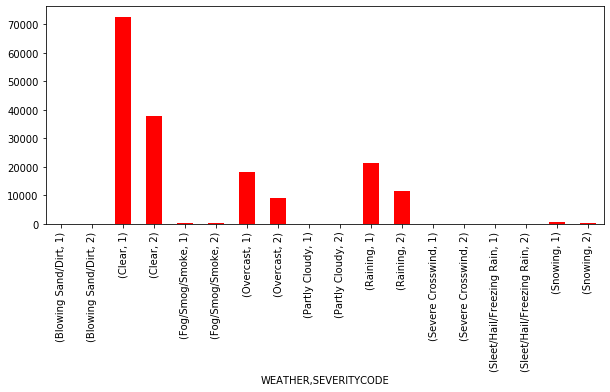

In [84]:
data_weather=Accid_df.groupby(['WEATHER'])['SEVERITYCODE'].value_counts()
data_weather
data_weather.plot.bar(figsize=(10,4),color='red')

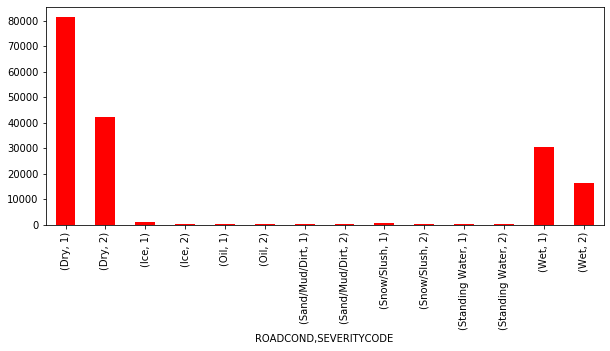

In [85]:
data_roadcond=Accid_df.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts()
data_roadcond
data_roadcond.plot.bar(figsize=(10,4), color='red')

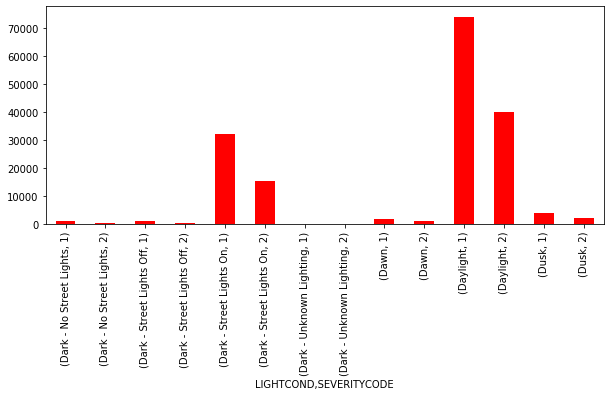

In [86]:
data_lightcond=Accid_df.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts()
data_lightcond
data_lightcond.plot.bar(figsize=(10,4), color='red')

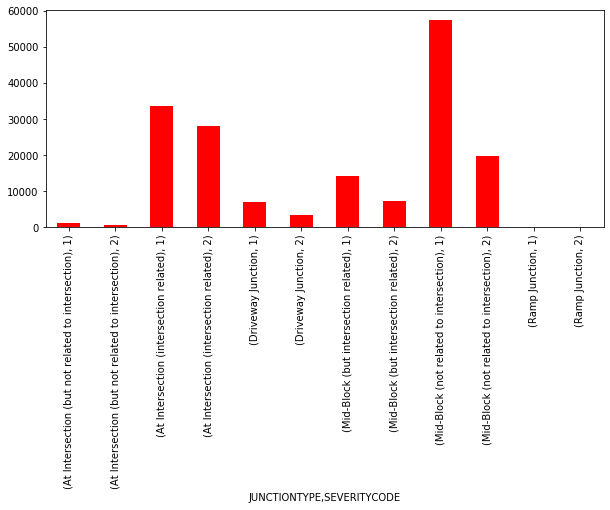

In [137]:
data_junctiontype=Accid_df.groupby(['JUNCTIONTYPE'])['SEVERITYCODE'].value_counts()
data_junctiontype
data_junctiontype.plot.bar(figsize=(10,4), color='red')

### Applying one-hot encoding for algorithms to work efficiently

In [124]:
Feature=Accid_df[['SEVERITYCODE']]
Feature=pd.concat([Feature,pd.get_dummies(Accid_df['WEATHER'])],axis=1)
Feature=pd.concat([Feature,pd.get_dummies(Accid_df['ROADCOND'])],axis=1)
Feature=pd.concat([Feature,pd.get_dummies(Accid_df['LIGHTCOND'])],axis=1)
Feature=pd.concat([Feature,pd.get_dummies(Accid_df['JUNCTIONTYPE'])],axis=1)
Feature.head()

,SEVERITYCODE,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,...,Dark - Unknown Lighting,Dawn,Daylight,Dusk,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction
0,2,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
5,2,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
6,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


### Using Down-Sampling techinque to balance the data

In [125]:
count_majority, count_minority = Feature['SEVERITYCODE'].value_counts()
majority_class=Feature[Feature['SEVERITYCODE']==1]
minority_class=Feature[Feature['SEVERITYCODE']==2]
df_class_under=majority_class.sample(count_minority)
df_balanced_under=pd.concat([minority_class,df_class_under],axis=0)
print(df_balanced_under['SEVERITYCODE'].value_counts())


2    59008
1    59008
Name: SEVERITYCODE, dtype: int64


### Defining the array for implementing algorithms

In [126]:
df_balanced_under_mod=df_balanced_under.drop('SEVERITYCODE',axis=1)
X=np.asarray(df_balanced_under_mod)
X[:5]

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0]], dtype=uint8)

In [127]:
y=np.asarray(df_balanced_under['SEVERITYCODE'])
y[:5]

array([2, 2, 2, 2, 2], dtype=int64)

### Standardizing the data

In [128]:
X1=preprocessing.StandardScaler().fit(X).transform(X)
X1[:5]

array([[-0.01594577,  0.74859716, -0.0570604 , -0.43212789, -0.00650914,
        -0.48944836, -0.01127464, -0.02178846, -0.06633278,  0.6307115 ,
        -0.07595793, -0.01770918, -0.01931243, -0.06581532, -0.02453519,
        -0.61318109, -0.08785845, -0.07943489, -0.6120169 , -0.01008422,
        -0.1217211 ,  0.70877011, -0.1854543 , -0.10342396, -0.79373183,
         4.02286708, -0.3758092 , -0.85107069, -0.02998317],
       [-0.01594577, -1.33583194, -0.0570604 ,  2.31412976, -0.00650914,
        -0.48944836, -0.01127464, -0.02178846, -0.06633278,  0.6307115 ,
        -0.07595793, -0.01770918, -0.01931243, -0.06581532, -0.02453519,
        -0.61318109, -0.08785845, -0.07943489,  1.63394181, -0.01008422,
        -0.1217211 , -1.41089471, -0.1854543 , -0.10342396, -0.79373183,
        -0.24857893, -0.3758092 ,  1.17499053, -0.02998317],
       [-0.01594577,  0.74859716, -0.0570604 , -0.43212789, -0.00650914,
        -0.48944836, -0.01127464, -0.02178846, -0.06633278,  0.6307115 ,
  

### Performing train and test split

In [138]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3, random_state=3)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y,test_size=0.2, random_state=4)

### Using Logistic Regression as modeling algorithm

In [130]:
logreg=LogisticRegression(C=0.01, solver="liblinear").fit(X1_train,y1_train)
logreg

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [131]:
y_hat=logreg.predict(X1_test)
y_hat[:5]

array([1, 1, 2, 1, 1], dtype=int64)

### Performing accuracy measuring techniques

In [132]:
jaccard_similarity_score(y1_test, y_hat)

C:\Users\sarfaraz.nawaz\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.5853245212675817

In [133]:
f1_score(y1_test,y_hat)

0.6192921042395956

In [134]:
accuracy_score(y1_test,y_hat)

0.5853245212675817

In [135]:
cnfn_metrics=metrics.confusion_matrix(y1_test,y_hat)
cnfn_metrics



array([[7961, 3871],
       [5917, 5855]], dtype=int64)

### Using Decision tree algorithm

In [144]:
dec_tree=DecisionTreeClassifier().fit(X_train,y_train)
y_hat1=dec_tree.predict(X_test)

### Accuracy measurements

In [145]:
jaccard_similarity_score(y_test, y_hat1)

C:\Users\sarfaraz.nawaz\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.5864143482558961

In [146]:
f1_score(y_test,y_hat1)

0.5970444976471561

In [147]:
accuracy_score(y_test,y_hat1)

0.5864143482558961

In [148]:
cnfn_metrics=metrics.confusion_matrix(y_test,y_hat1)
cnfn_metrics

array([[10848,  6730],
       [ 7913,  9914]], dtype=int64)